# Analyse de Données
## Mini Projet SVD avec  Numpy

### Réalisée par: Kaouthar BOUSBAA

#### Partie I: Compression d'une image en noir et blanc:

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

On a une matrice M, et on la décompose en M = U.Sigma.VT et ce que nous pourrions 
faire est d'approximer cette matrice par un rang inférieur "r", et de cette façon nous approximerons l'image.
M est une image à deux dimensions, on va approximer cette image comme le produit de quelques colonnes et lignes (pixels).
Et ce serait une compression car au lieu de stocker toutes ces n lignes m colonnes, je n'ai plus qu'à stocker r.

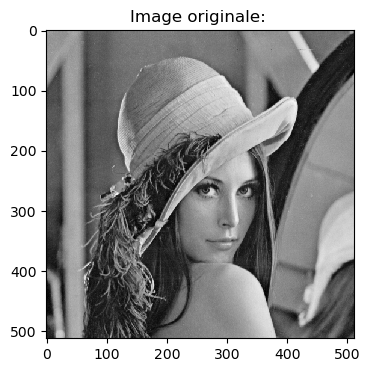

In [25]:
#Téléchargement de l'image lena_gris.png:
X = imread('lena_couleurs.jpg')
M =np.mean(X, -1)
img = plt.imshow(M)
img.set_cmap('gray')
plt.title('Image originale: ')
plt.show()

On va prendre ce tableau qui est essentiellement notre 
matrice de données M et nous allons la compresser en U.Sigma.VT, 
puis nous nous rapprocherons pour différentes valeurs de k (k=10, 20, 30, 150)
full_matrices = False : Au lieu de retourner une matrice U qui est n*n énorme, 
on va juste retourner les m premières colonnes de U correspondant aux valeurs singulières non nulles.

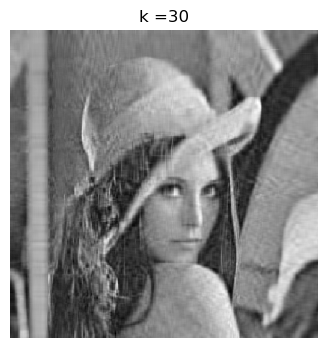

In [26]:
def compression(M, k):

    ## Décomposition en valeurs singulière
    U, Sigma, VT = np.linalg.svd(M, full_matrices = False) 
    # Extraction des valeurs diagonales singulières de la matrice Sigma
    Sigma = np.diag(Sigma)
    M_approximation = U[:,:k] @ Sigma[0:k, :k] @ VT[:k, :]
    plt.figure(1)
    img = plt.imshow(M_approximation)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('k ='+str(k))
    plt.show()

compression(M, 30)

Les données des matrices U, Σ et V sont triées en fonction de leur contribution à la matrice M du produit. 
Cela nous permet d'obtenir une assez bonne approximation en n'utilisant que les parties les plus importantes des matrices.
Ce qu'on a fait c'est choisir un nombre k = 30 de valeurs 
singulières qu'on va l'utiliser pour l'approximation. 
Plus ce nombre est élevé, plus la meilleure est la qualité de l'approximation 
mais aussi plus il faut plus de données pour l'encoder. 
Nous ne prenons maintenant que les 30 premières colonnes de U et V et le pixel (k × k) de Σ qui contient 
les 30 valeurs singulières les plus grandes, et donc les plus importantes. Nous avons alors
la quantité de données nécessaire pour stocker cette approximation est égale à :
q = m × k + k + k × n = k × (1 + m + n) où k = 30 pour notre cas.
Pour calculer le taux de compression, il nous faut que taux = taille de l'image / q
soit donc: taux de compression = (m × n)/(m × k + k + k × n)

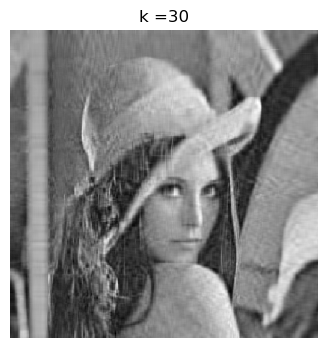

Le taux de compression pour k =  30 est  8.5250081300813


In [15]:
def compression(M, k):

    ## Décomposition en valeurs singulière
    U, Sigma, VT = np.linalg.svd(M, full_matrices = False) 
    # Extraction des valeurs diagonales singulières de la matrice Sigma
    Sigma = np.diag(Sigma)
    M_approximation = U[:,:k] @ Sigma[0:k, :k] @ VT[:k, :]
    # Déterminons le taux de compression:
    DIM = M.shape
    m = DIM[0]
    n = DIM[1]
    taux_compression = (m * n) / (m*k + k + k*n)
    plt.figure(1)
    img = plt.imshow(M_approximation)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('k ='+str(k))
    plt.show()
    print("Le taux de compression pour k = ", k,"est ", taux_compression)

compression(M, 30)


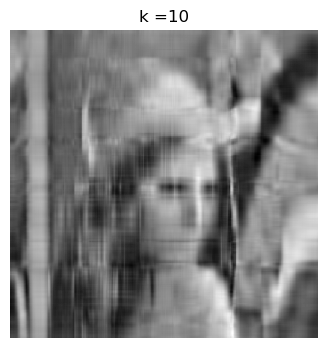

Le taux de compression pour k =  10 est  25.575024390243904


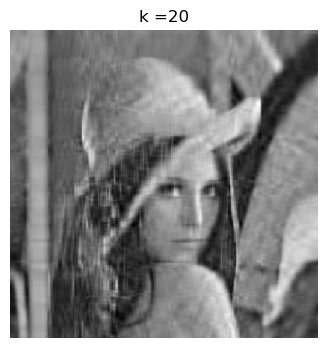

Le taux de compression pour k =  20 est  12.787512195121952


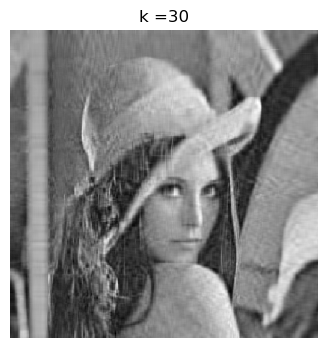

Le taux de compression pour k =  30 est  8.5250081300813


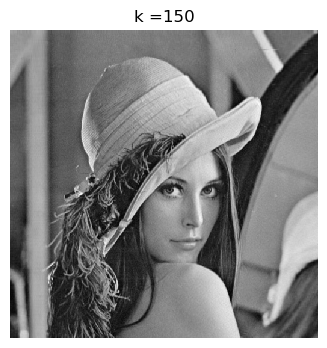

Le taux de compression pour k =  150 est  1.7050016260162602


In [16]:
constante = 0
DIM = M.shape
m = DIM[0]
n = DIM[1]
for k in (10, 20, 30, 150):
    ## Décomposition en valeurs singulière
    U, Sigma, VT = np.linalg.svd(M, full_matrices = False) 
    # Extraction des valeurs diagonales singulières de la matrice Sigma
    Sigma = np.diag(Sigma)
    M_approximation = U[:,:k] @ Sigma[0:k, :k] @ VT[:k, :]
    # Déterminons le taux de compression:
    taux_compression = (m * n) / (m*k + k + k*n)
    plt.figure(1)
    img = plt.imshow(M_approximation)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('k ='+str(k))
    plt.show()
    print("Le taux de compression pour k = ", k,"est ", taux_compression)


À k = 20, on a gardé que les 20 premières colonnes U et les 20 premières colonnes de V. 
L'image obtenue n'est pas claire, car nous n'avons pas assez de données.
À k = 150, c'est une approximation fidèle, ce n'est que 6% des données d'origine qui sont manquées. 
donc si nous ne stockions que 150 colonnes de U et V et les premiers éléments diagonaux de Sigma, 
on a quand même une bonne construction de l'image.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


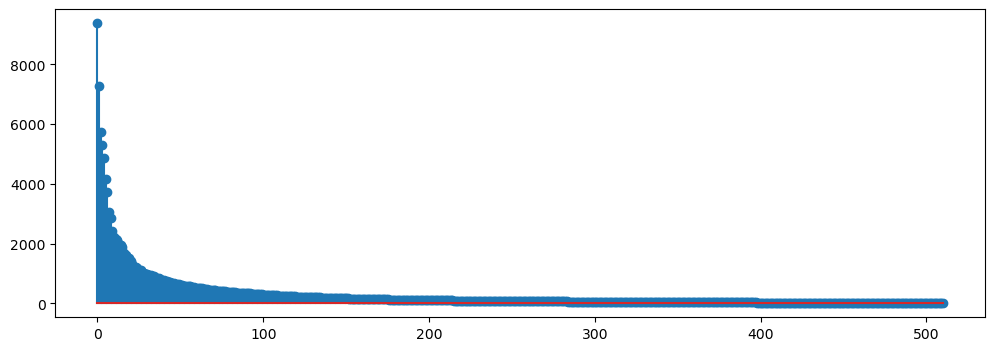

In [17]:
# Traçons maintenant le graphe donnant les valeurs singulières en fonction de k:
diag_elem = np.diag(Sigma)
plt.stem(diag_elem[1:])
plt.show()

Comme on peut le constater, ces valeurs diminuent, et on peut voir que seuls les 200 premiers 
éléments ont des valeurs significatives.
on peut rejeter donc les valeurs les plus basses et ne garder que l'important.
Car il vaut mieux que l'approximation soit facile de la matrice avec une précision précise aussi.

Trouvons d'abord la valeur de k permettant de capter 95% de la variance:
La quantité de variance expliquée par la i-ème vecteurs  de SVD
est donnée par R2=(S_i)^2/∑j(S_j)^2, où S_j sont des valeurs singulières (diagonale de S). 

In [18]:
variance = np.cumsum(Sigma)/np.sum(Sigma)
r = np.min(np.where(variance >= 0.95))
print(r)

114399


On affiche la compression via SVD pour la valeur de k trouvée qui permet de capter 95% de la variance:

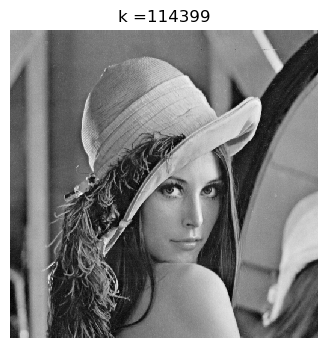

Le taux de compression pour k =  114399 est  0.0022355985970370284


In [19]:
compression(M, r)

### Partie II:Compression d'une image RGB via SVD:

In [20]:
#Téléchargement de l'image lena_couleurs:
M = imread('lena_couleurs.jpg')

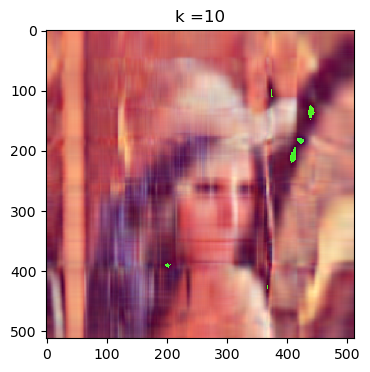

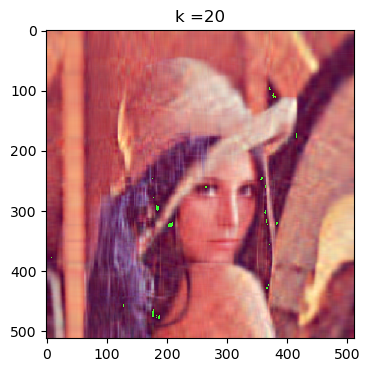

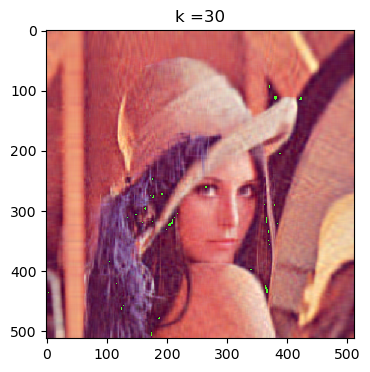

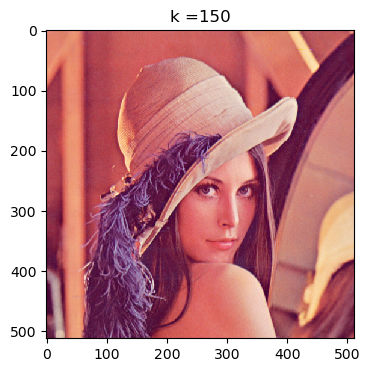

In [21]:
R = M[:,:,0] / 0xff
G = M[:,:,1] / 0xff
B = M[:,:,2] / 0xff

R_U, R_S, R_VT = np.linalg.svd(R)
G_U, G_S, G_VT = np.linalg.svd(G)
B_U, B_S, B_VT = np.linalg.svd(B)
R_sigma = np.diag(R_S)
G_sigma = np.diag(G_S)
B_sigma = np.diag(B_S)
for k in (10, 20, 30, 150):
    compression_rouge = R_U[:,:k] @ R_sigma[0:k, :k] @ R_VT[:k, :]
    compression_jaune = G_U[:,:k] @ G_sigma[0:k, :k] @ G_VT[:k, :]
    compression_bleu = B_U[:,:k] @ B_sigma[0:k, :k] @ B_VT[:k, :]
    colormatrices = np.dstack((compression_rouge, compression_jaune, compression_bleu))
    compressee = (np.minimum(colormatrices, 1.0) * 0xff).astype(np.uint8)
    plt.title('k ='+str(k))
    plt.figure(1)
    img = plt.imshow(compressee)
    plt.show()